In [20]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns

% matplotlib inline
% load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","31,32,33,34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15","17,18",1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32","34,35",1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [22]:
data['Ptl_note'].value_counts()

50Hz EI high freq        12
E_I_2Hz_associative      12
50Hz EI preonly          12
E_I_2Hz_Associ_AM251     11
EI_antihebbian           10
EI_low high              10
50Hz EI postonly         10
50Hz IE preonly           9
50Hz IE postonly          9
50Hz IE high freq         8
E_I_2Hz_POST_AM251        7
E_I_preonly_low           7
No ptl                    7
E_I_50Hz_Associ_AM251     6
50Hz II high freq         5
EI_high_low               5
 Naspm 100 uM             5
IE_high_low               4
E_i_postsynapti_low       4
IE_high low               4
Naspm 100 uM              2
E_I_postsynapti_low       2
pre only after Naspm      1
50 hZ II preonly          1
-67.5                     1
50 Hz II preonly          1
Name: Ptl_note, dtype: int64

In [23]:
data_pre_2Hz_reci = data[(data['Ptl_note']=='E_I_preonly_low')&(data['Reci']==1)]
# data_pre_2Hz_uni = data[(data['Ptl_note']=='E_I_preonly_low')&(data['Reci']==0)]

In [24]:
data_pre_2Hz_reci.drop(112, axis=0, inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
data_pre_2Hz_reci

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
107,2017071401,31,2,1,1,0,1,"47,48,49","51,52",14,0,"Small, weak LTD",E_I_preonly_low
108,2017071902,28,2,1,1,0,1,"5,6,7","9,10,11",14,17,"Huge amp, strong LTD",E_I_preonly_low
109,2017071903,29,1,1,1,0,1,"13,14,15,16,17","19,20,21,22,23",14,4,"Small amp, weak LTD",E_I_preonly_low
110,2017071903,29,2,1,1,0,1,"13,14,15,16,17","19,20,21,22,23",14,0,"Smal amp, weak LTD",E_I_preonly_low
111,2017080401,27,2,1,1,0,1,"5,6","8,9,10,11",14,4,NaN,E_I_preonly_low
113,2017072102,30,3,1,1,0,1,"12,13,14","16,17,18,19,20",14,0,WeakLTD,E_I_preonly_low


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


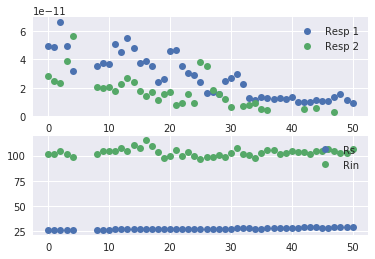

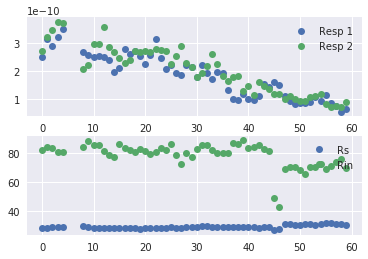

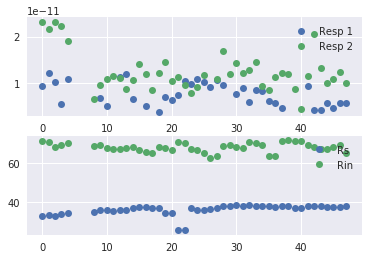

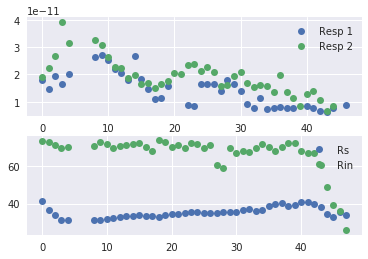

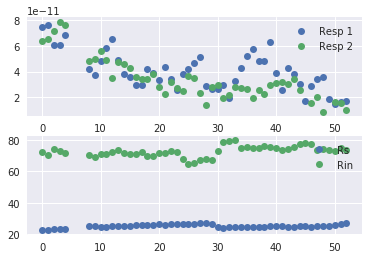

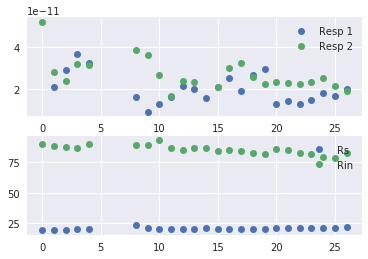

In [26]:
patch_pip.df_ana(data_pre_2Hz_reci,'data_pre_2Hz_reci')
pre_2Hz_reci = pd.read_pickle('data_pre_2Hz_reci')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(pre_2Hz_reci)

<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


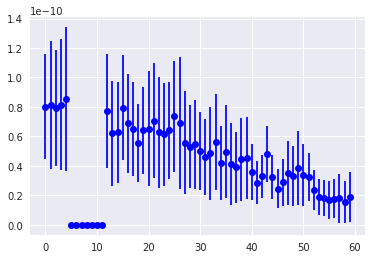

In [15]:
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [27]:
elimi = np.array([30,35,45,30,40,25])
elimi_sr = pd.Series(elimi, index=pre_2Hz_reci.index)
pre_2Hz_reci['elimi']=elimi_sr

In [28]:
pre_2Hz_reci.to_pickle('/data/ana_pre_2Hz_reci')